Import Necessary Module

In [1]:
import requests
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import datetime  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


Fetch Top 10 Company Stock on YAHOO Finance using module yfinance

In [2]:
#Create a DataFrame of top 10 stock in Yahoo Finance from 01-01-2012 - 31-12-2022

def fetch_sp500_companies():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    html = requests.get(url).content
    df_list = pd.read_html(html)
    sp500_df = df_list[0]
    return sp500_df[['Symbol', 'Security', 'GICS Sector', 'GICS Sub-Industry', 'Headquarters Location']]

def fetch_market_caps(symbols):
    market_caps = {}
    for symbol in symbols:
        try:
            info = yf.Ticker(symbol).info
            if 'marketCap' in info:
                market_caps[symbol] = {'Market Cap': info['marketCap'], 'Company Name': info['longName'], 'Location': info['city']}
        except Exception as e:
            print(f"Error fetching market cap data for {symbol}: {e}")
            continue
    return market_caps

def format_market_cap(market_cap):
    if market_cap >= 10**12:
        return f"{market_cap / 10**12:.2f}T"
    elif market_cap >= 10**9:
        return f"{market_cap / 10**9:.2f}B"
    elif market_cap >= 10**6:
        return f"{market_cap / 10**6:.2f}M"
    else:
        return f"{market_cap}"

def fetch_top_stocks():
    sp500_symbols = fetch_sp500_companies()['Symbol'].tolist()
    market_caps = fetch_market_caps(sp500_symbols)
    top_stocks = sorted(market_caps.items(), key=lambda item: item[1]['Market Cap'], reverse=True)[:10]
    return top_stocks

# Fetch top stocks
top_stocks = fetch_top_stocks()

# Convert the result into a DataFrame
data = [{'Symbol': stock[0],
         'Company Name': stock[1]['Company Name'],
         'Location': stock[1]['Location'],
         'Market Cap': format_market_cap(stock[1]['Market Cap'])} for stock in top_stocks]

df = pd.DataFrame(data)

# Initialize a dictionary to store stock data
stock_data = {}

# Download stock data for all stocks available in df
for symbol in df['Symbol']:
    try:
        stock_data[symbol] = yf.download(symbol, start="2012-01-01", end="2022-12-31")
    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")
        continue

# Convert stock_data into a single DataFrame
all_stock_data = pd.concat(stock_data.values(), keys=stock_data.keys(), names=['Symbol', 'Date'])

# Reset index to make Symbol and Date as columns
all_stock_data.reset_index(inplace=True)


# Merge with the DataFrame containing company information
all_stock_data = pd.merge(all_stock_data, df[['Symbol', 'Company Name', 'Location']], on='Symbol', how='left')

# Display the updated DataFrame
print(all_stock_data.head())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

  Symbol       Date       Open       High        Low      Close  Adj Close  \
0   AVGO 2012-01-03  29.480000  30.170000  28.889999  28.950001  21.014938   
1   AVGO 2012-01-04  28.889999  29.090000  28.100000  28.450001  20.651979   
2   AVGO 2012-01-05  28.459999  28.750000  28.180000  28.490000  20.681013   
3   AVGO 2012-01-06  28.410000  28.549999  28.020000  28.309999  20.550362   
4   AVGO 2012-01-09  29.299999  30.389999  29.250000  30.219999  21.936831   

    Volume   Company Name   Location  
0  2303200  Broadcom Inc.  Palo Alto  
1  2025400  Broadcom Inc.  Palo Alto  
2  2007500  Broadcom Inc.  Palo Alto  
3  2435700  Broadcom Inc.  Palo Alto  
4  3348500  Broadcom Inc.  Palo Alto  


In [3]:
#Print to see the company symbol
unique_symbols = all_stock_data['Symbol'].unique().tolist()
unique_symbols

['AVGO',
 'AAPL',
 'MSFT',
 'NVDA',
 'GOOG',
 'GOOGL',
 'AMZN',
 'META',
 'LLY',
 'TSLA']

In [4]:
all_stock_data.head()

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume,Company Name,Location
0,AVGO,2012-01-03,29.480000,30.170000,28.889999,28.950001,21.014938,2303200,Broadcom Inc.,Palo Alto
1,AVGO,2012-01-04,28.889999,29.090000,28.100000,28.450001,20.651979,2025400,Broadcom Inc.,Palo Alto
2,AVGO,2012-01-05,28.459999,28.750000,28.180000,28.490000,20.681013,2007500,Broadcom Inc.,Palo Alto
3,AVGO,2012-01-06,28.410000,28.549999,28.020000,28.309999,20.550362,2435700,Broadcom Inc.,Palo Alto
4,AVGO,2012-01-09,29.299999,30.389999,29.250000,30.219999,21.936831,3348500,Broadcom Inc.,Palo Alto


In [5]:
#summary of the data
all_stock_data.info()
all_stock_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27585 entries, 0 to 27584
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Symbol        27585 non-null  object        
 1   Date          27585 non-null  datetime64[ns]
 2   Open          27585 non-null  float64       
 3   High          27585 non-null  float64       
 4   Low           27585 non-null  float64       
 5   Close         27585 non-null  float64       
 6   Adj Close     27585 non-null  float64       
 7   Volume        27585 non-null  int64         
 8   Company Name  27585 non-null  object        
 9   Location      27585 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 2.1+ MB


,Date,Open,High,Low,Close,Adj Close,Volume
count,27585,27585.000000,27585.000000,27585.000000,27585.000000,27585.000000,2.758500e+04
mean,2017-07-10 00:04:26.231647488,91.869367,92.989253,90.705515,91.879075,87.045988,1.005981e+08
min,2012-01-03 00:00:00,0.287250,0.290750,0.278750,0.284500,0.260951,1.584340e+05
25%,2014-10-14 00:00:00,22.687500,22.988832,22.396053,22.681982,22.028181,1.779800e+07
50%,2017-07-11 00:00:00,53.560001,54.099998,52.930000,53.560001,50.017597,4.108360e+07
75%,2020-04-07 00:00:00,128.429993,130.032501,126.768997,128.419998,122.375999,9.868000e+07
max,2022-12-30 00:00:00,677.549988,677.760010,669.119995,674.280029,634.010742,3.692928e+09
std,NaN,101.665103,102.992413,100.263508,101.663147,96.562099,1.654264e+08


Exploratory Data Analysis

In [6]:
#Initialize the new DF
new_stock_data = all_stock_data.copy()
new_stock_data.head() # print to check any discrepancy issue
new_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27585 entries, 0 to 27584
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Symbol        27585 non-null  object        
 1   Date          27585 non-null  datetime64[ns]
 2   Open          27585 non-null  float64       
 3   High          27585 non-null  float64       
 4   Low           27585 non-null  float64       
 5   Close         27585 non-null  float64       
 6   Adj Close     27585 non-null  float64       
 7   Volume        27585 non-null  int64         
 8   Company Name  27585 non-null  object        
 9   Location      27585 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 2.1+ MB


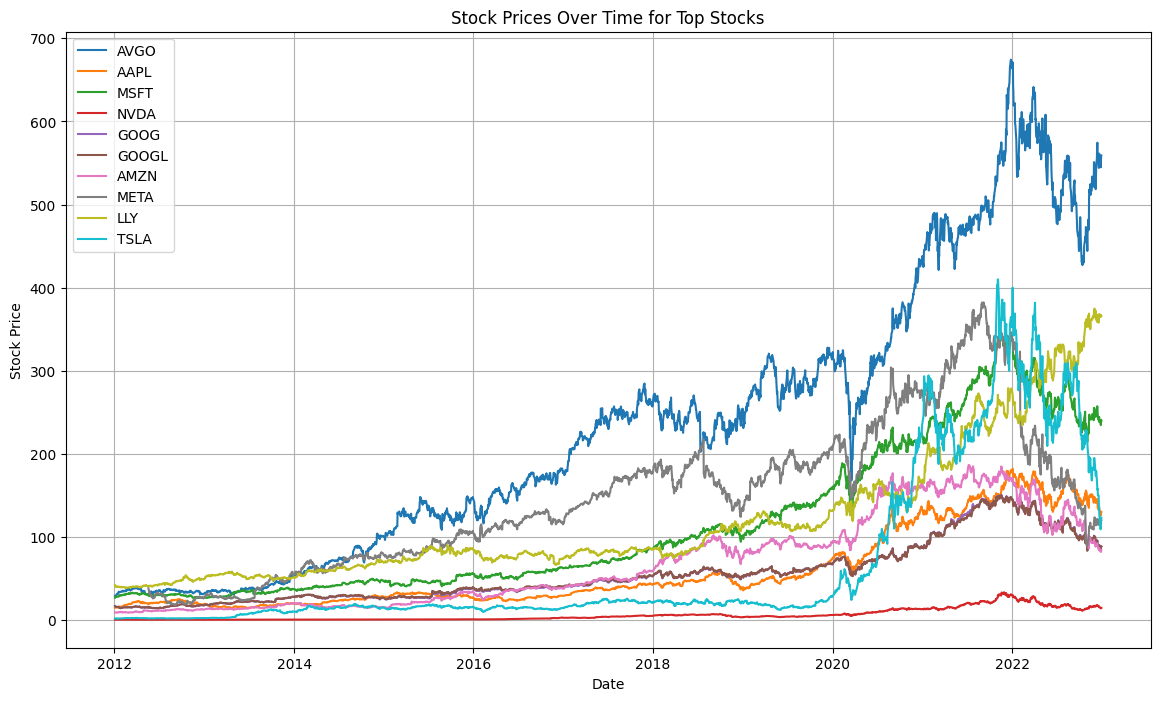

In [7]:
#Lets See the Stock Price Perfomance against Time

plt.figure(figsize=(14, 8))
# Iterate through each symbol and plot the stock prices
for symbol in df['Symbol']:
    # Filter data for the current symbol
    stock_data_symbol = new_stock_data[new_stock_data['Symbol'] == symbol]
    
    # Plot the Date against the Close price for the current symbol
    plt.plot(stock_data_symbol['Date'], stock_data_symbol['Close'], label=symbol)

# Set plot title and labels
plt.title('Stock Prices Over Time for Top Stocks')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


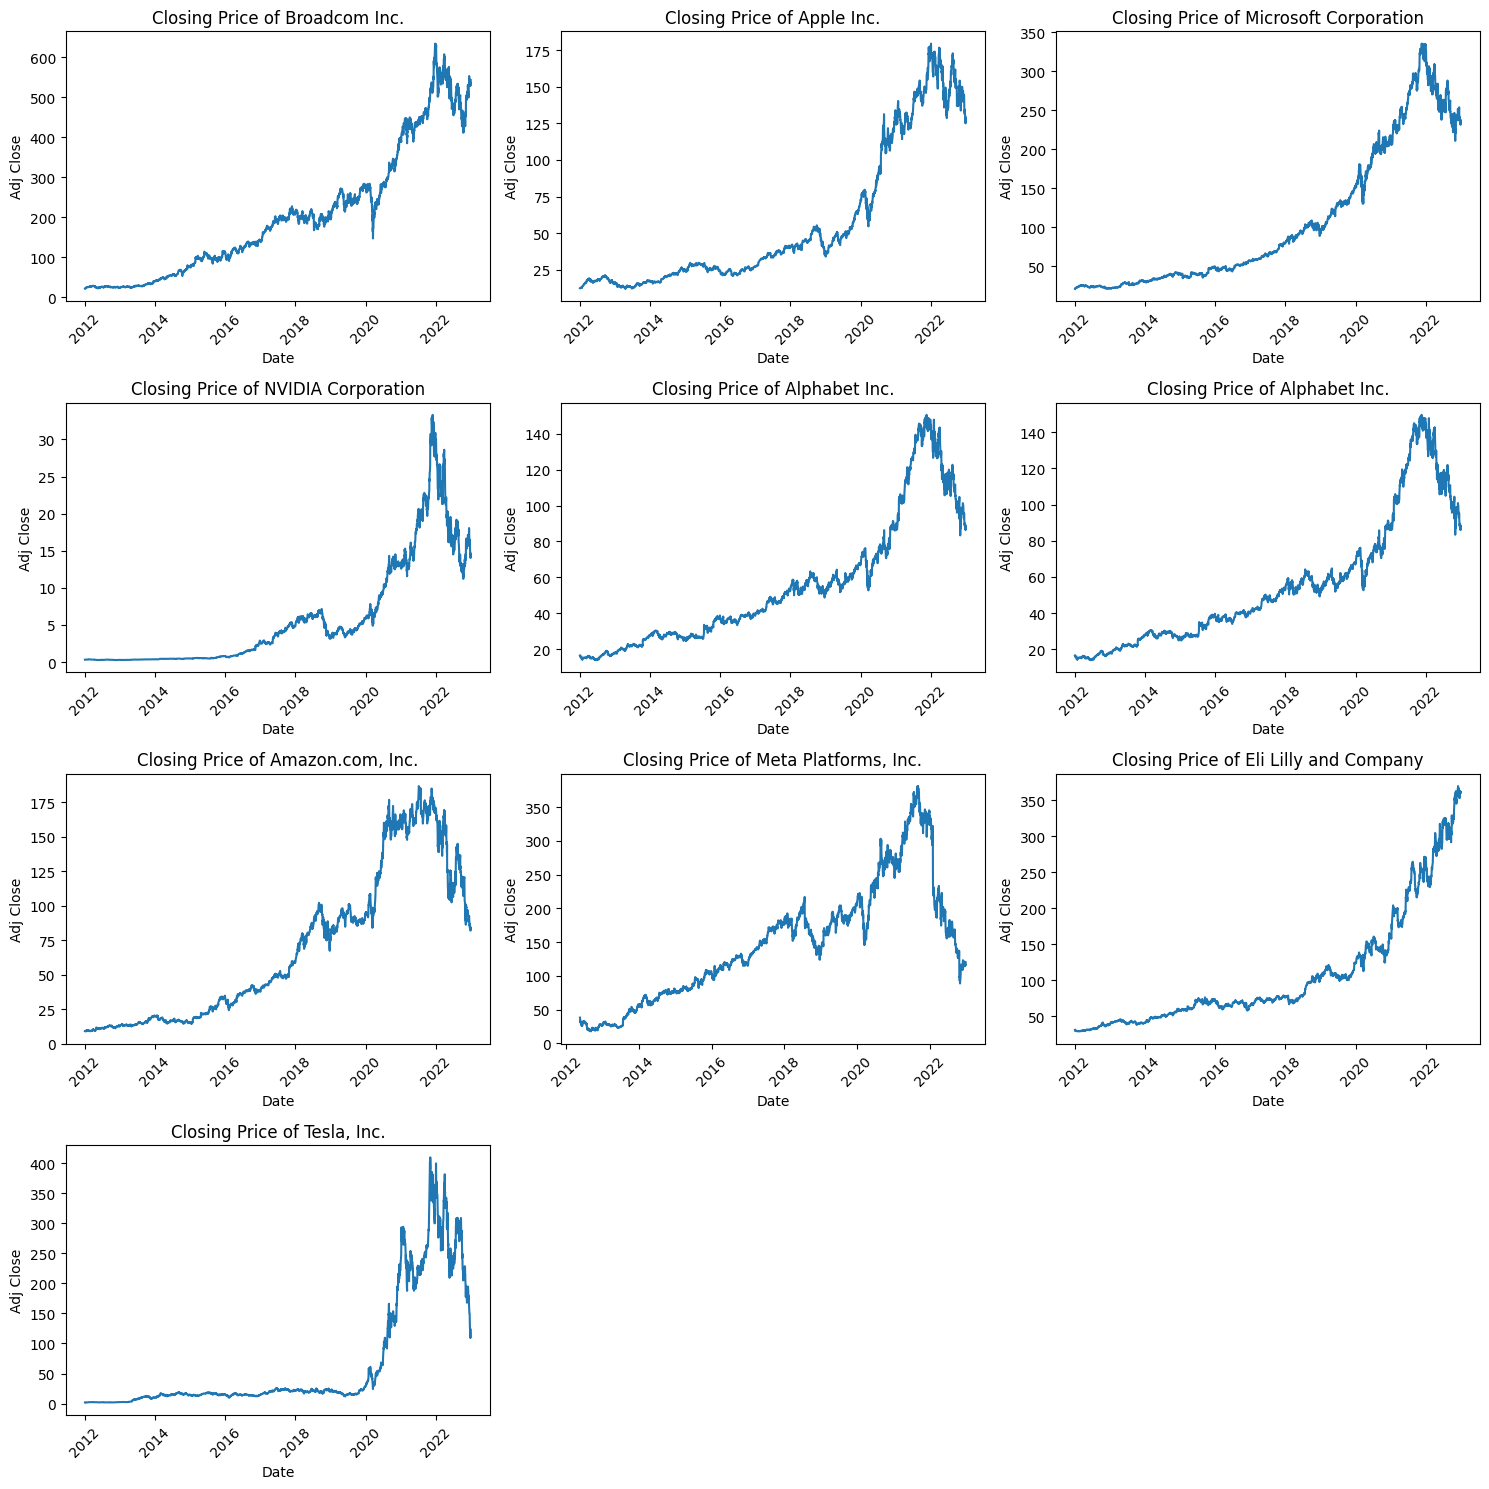

In [8]:
#Plot the closing price for the stock to see the historical,check any price anomaly and also assess the price volatility

num_stocks = len(df) 
num_cols = 3  
num_rows = (num_stocks + num_cols - 1) // num_cols 

plt.figure(figsize=(15, 15))  # 
plt.subplots_adjust(top=1.1, hspace=0.4)

# Iterate over each stock symbol in df
for i, symbol in enumerate(df['Symbol'], 1):
    plt.subplot(num_rows, num_cols, i)  # Create subplot
    stock_data_symbol = new_stock_data[new_stock_data['Symbol'] == symbol]  
    plt.plot(stock_data_symbol['Date'], stock_data_symbol['Adj Close'])  
    plt.ylabel('Adj Close')  # Label for y-axis
    plt.xlabel('Date')  # Label for x-axis
    plt.title(f"Closing Price of {df[df['Symbol'] == symbol]['Company Name'].iloc[0]}")  
    plt.xticks(rotation=45) 

plt.tight_layout()  
plt.show()  


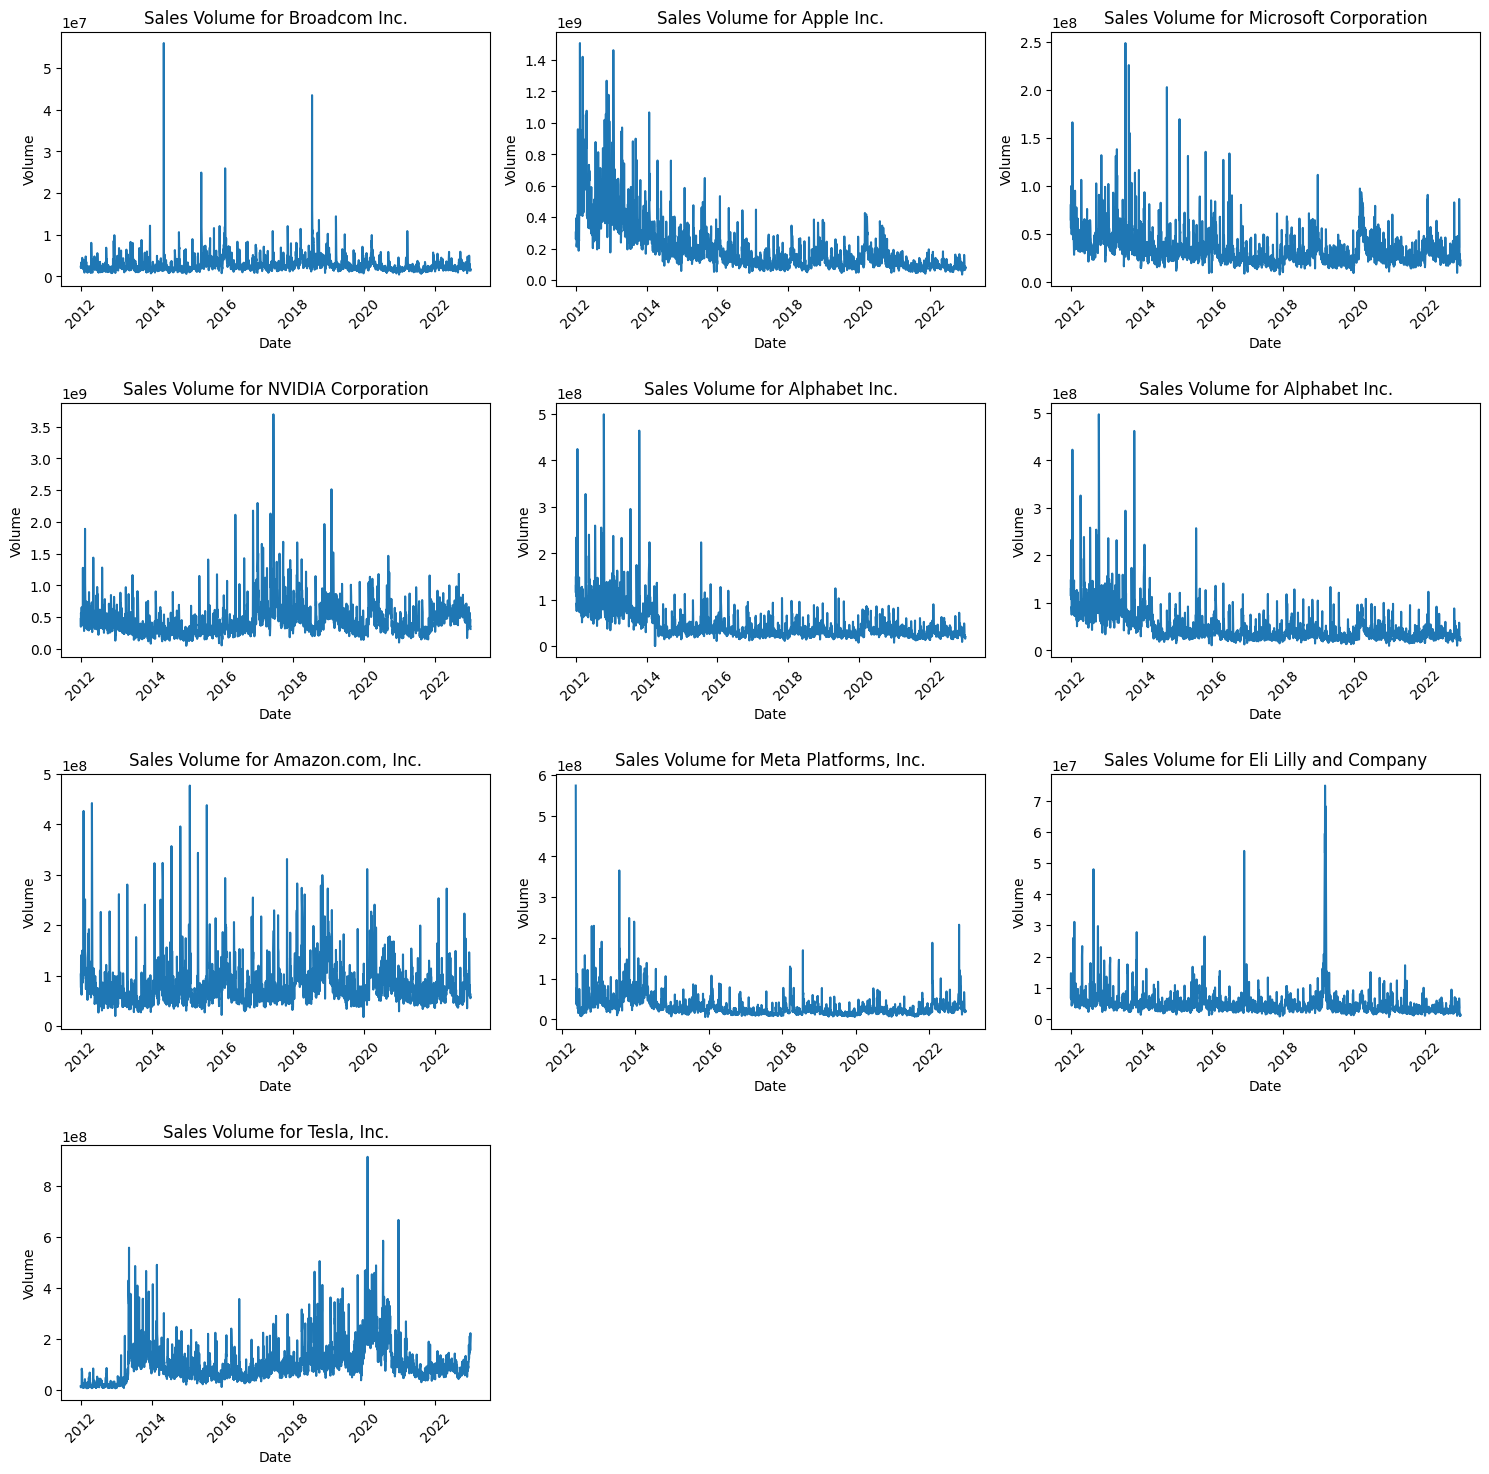

In [9]:
num_stocks = len(df)  
num_cols = 3  
num_rows = (num_stocks + num_cols - 1) // num_cols  


plt.figure(figsize=(15, 15)) 
plt.subplots_adjust(top=1.1, hspace=0.4)

# Iterate over each stock symbol in df
for i, symbol in enumerate(df['Symbol'], 1):
    plt.subplot(num_rows, num_cols, i)  # Create subplot
    stock_data_symbol = new_stock_data[new_stock_data['Symbol'] == symbol]  
    plt.plot(stock_data_symbol['Date'], stock_data_symbol['Volume']) 
    plt.ylabel('Volume')  # Label for y-axis
    plt.xlabel('Date')  # Label for x-axis
    plt.title(f"Sales Volume for {df[df['Symbol'] == symbol]['Company Name'].iloc[0]}") 
    plt.xticks(rotation=45) 
    
plt.tight_layout()  
plt.show()  

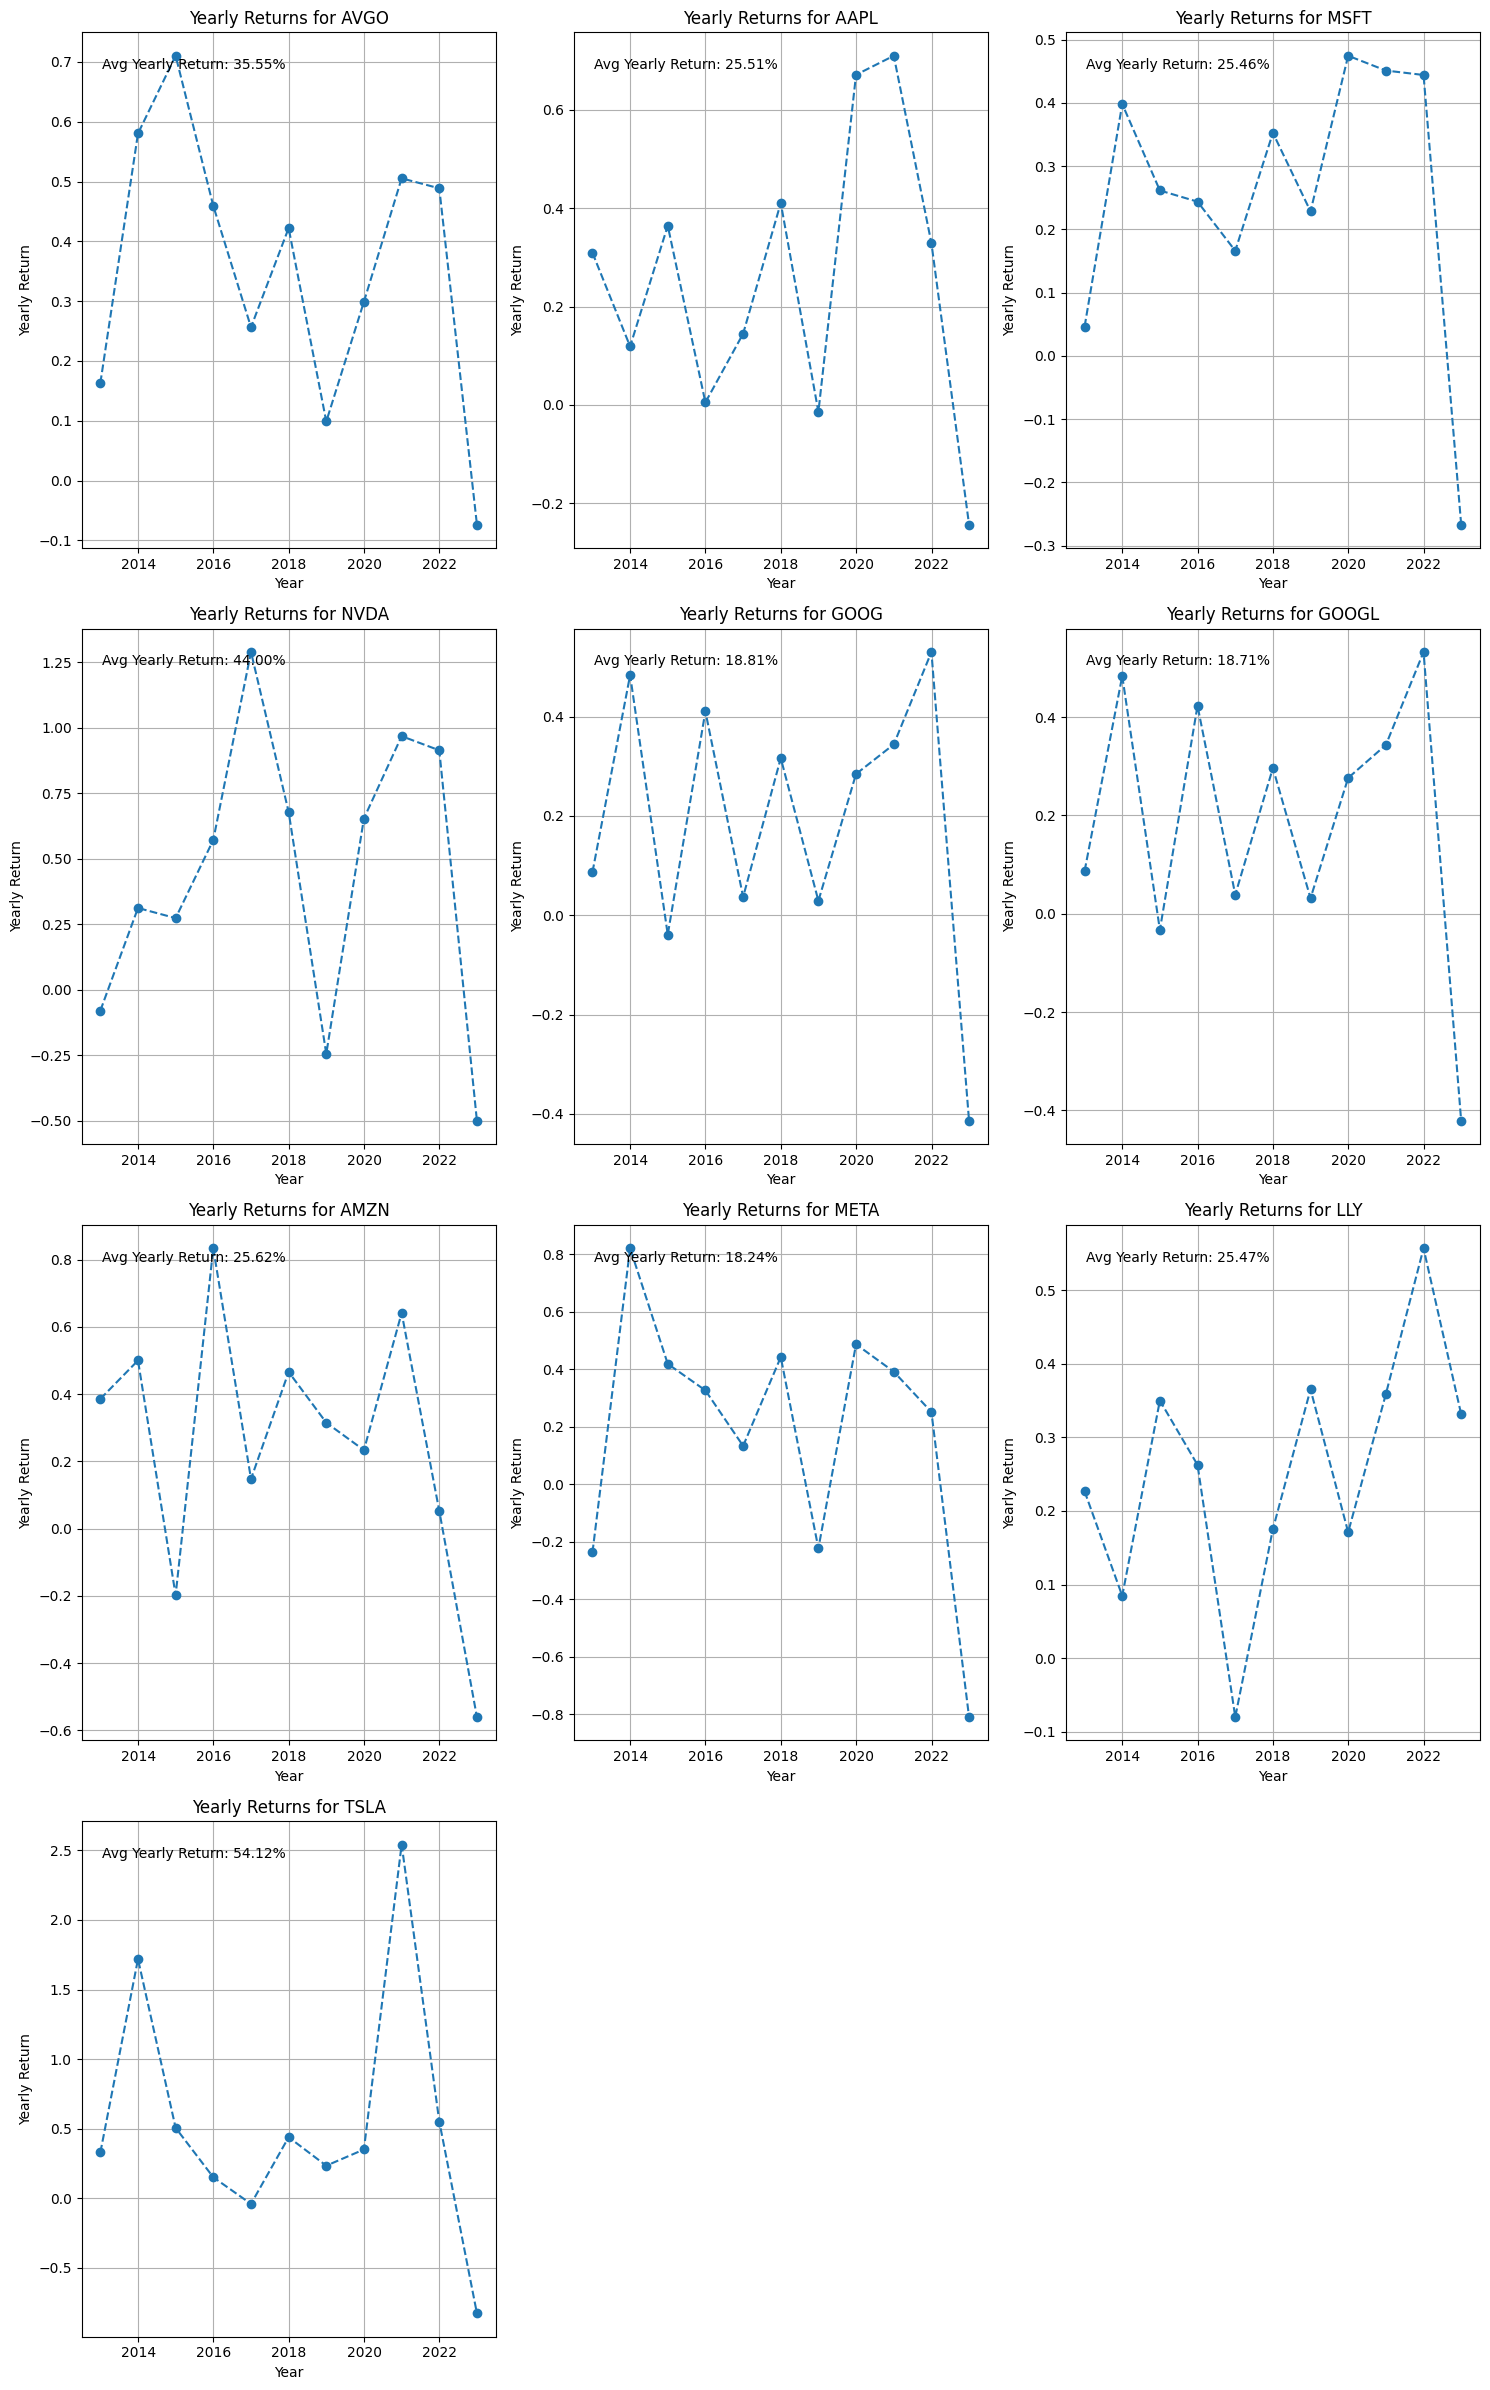

In [10]:
# Get unique symbols from new_stock_data
all_symbols = new_stock_data['Symbol'].unique()

num_symbols = len(all_symbols)
num_cols = 3 
num_rows = (num_symbols + num_cols - 1) // num_cols  

# Calculate and plot yearly returns for each symbol
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 6 * num_rows))

for i, symbol in enumerate(all_symbols):
    row = i // num_cols
    col = i % num_cols
    
    data = new_stock_data[new_stock_data['Symbol'] == symbol].copy()
    
    # Ensure index is datetime
    data.set_index('Date', inplace=True)
    data.index = pd.to_datetime(data.index)
    
    # Calculate daily returns using percentage change
    data['Daily Return'] = data['Adj Close'].pct_change()
    
    # Calculate yearly returns by resampling to yearly frequency and summing daily returns
    yearly_returns = data['Daily Return'].resample('YE').sum()
    
    # Plot yearly returns
    axes[row, col].plot(yearly_returns.index, yearly_returns.values, linestyle='--', marker='o')
    axes[row, col].set_title(f'Yearly Returns for {symbol}')
    axes[row, col].set_xlabel('Year')
    axes[row, col].set_ylabel('Yearly Return')
    axes[row, col].grid(True)
    
    # Calculate and display average yearly return
    avg_yearly_return = yearly_returns.mean()
    axes[row, col].annotate(f'Avg Yearly Return: {avg_yearly_return:.2%}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, ha='left', va='top')

# Remove empty subplots
if num_symbols < num_rows * num_cols:
    for i in range(num_symbols, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


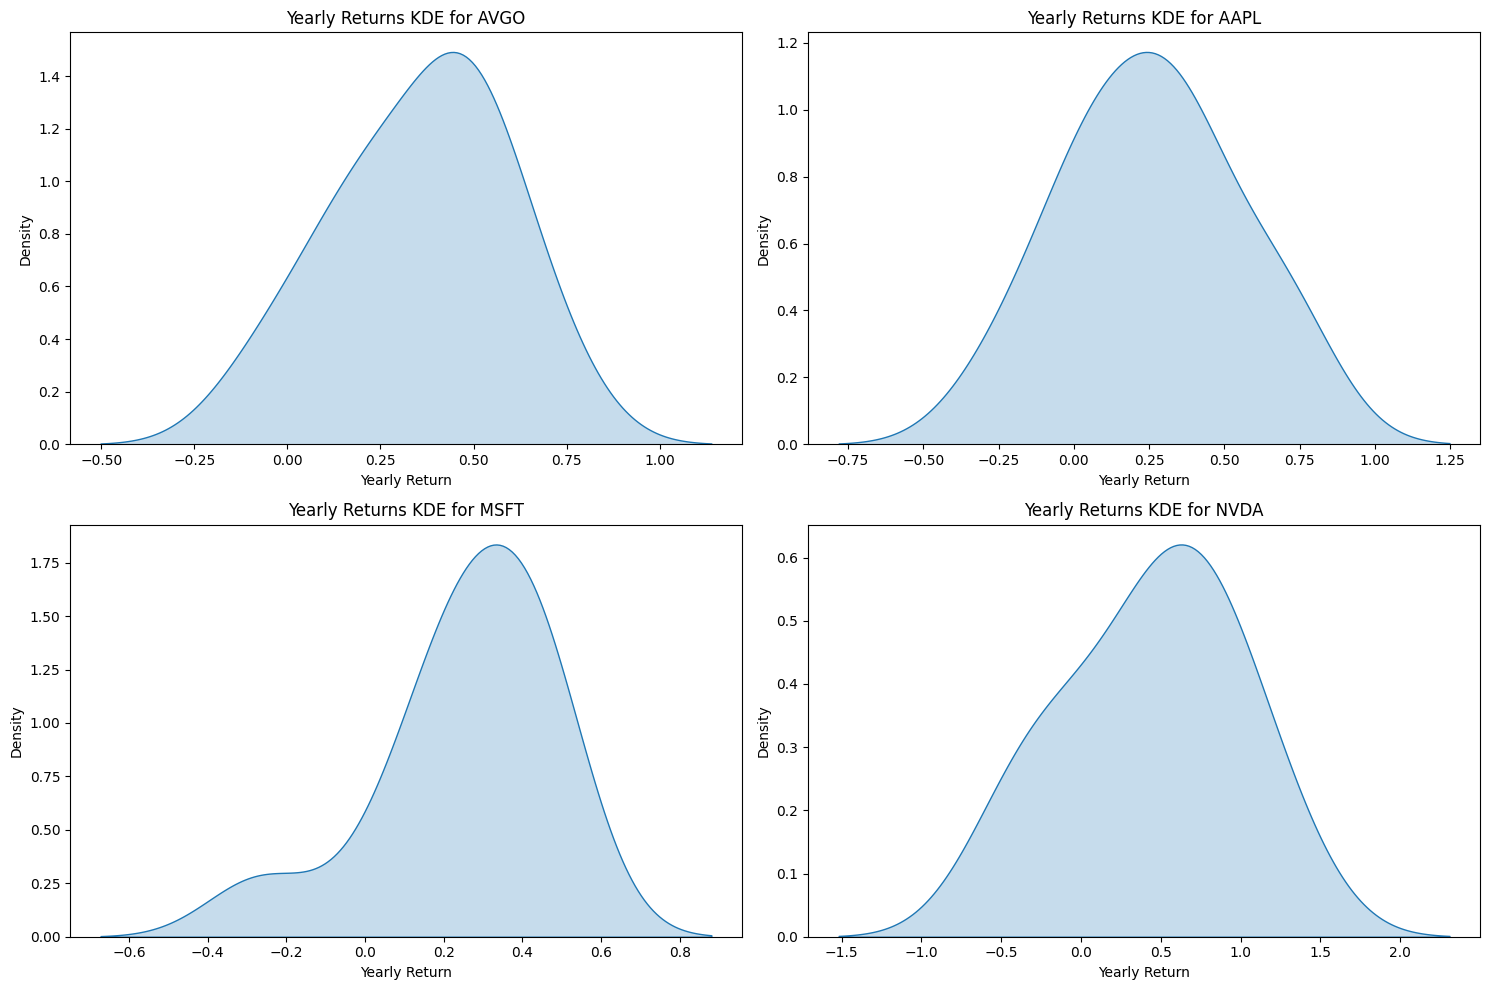

In [11]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Select top 4 companies based on market capitalization
top_symbols = df['Symbol'][:4]

# Create subplots for KDE plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i, symbol in enumerate(top_symbols):
    data = all_stock_data[all_stock_data['Symbol'] == symbol].copy()
    
    # Ensure the 'Date' column is in datetime format and set as index
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
    
    # Calculate daily returns using percentage change
    data['Daily Return'] = data['Adj Close'].pct_change()
    
    # Calculate yearly returns by resampling to yearly frequency and summing daily returns
    yearly_returns = data['Daily Return'].resample('YE').sum()
    
    # Plot KDE plot for yearly returns
    sns.kdeplot(yearly_returns, ax=axes[i//2, i%2], fill=True)
    axes[i//2, i%2].set_title(f'Yearly Returns KDE for {symbol}')
    axes[i//2, i%2].set_xlabel('Yearly Return')
    axes[i//2, i%2].set_ylabel('Density')

plt.tight_layout()
plt.show()

We will further identify using LSMA instead of MA. LSMA provide less noise and higher sensitvity to price movement

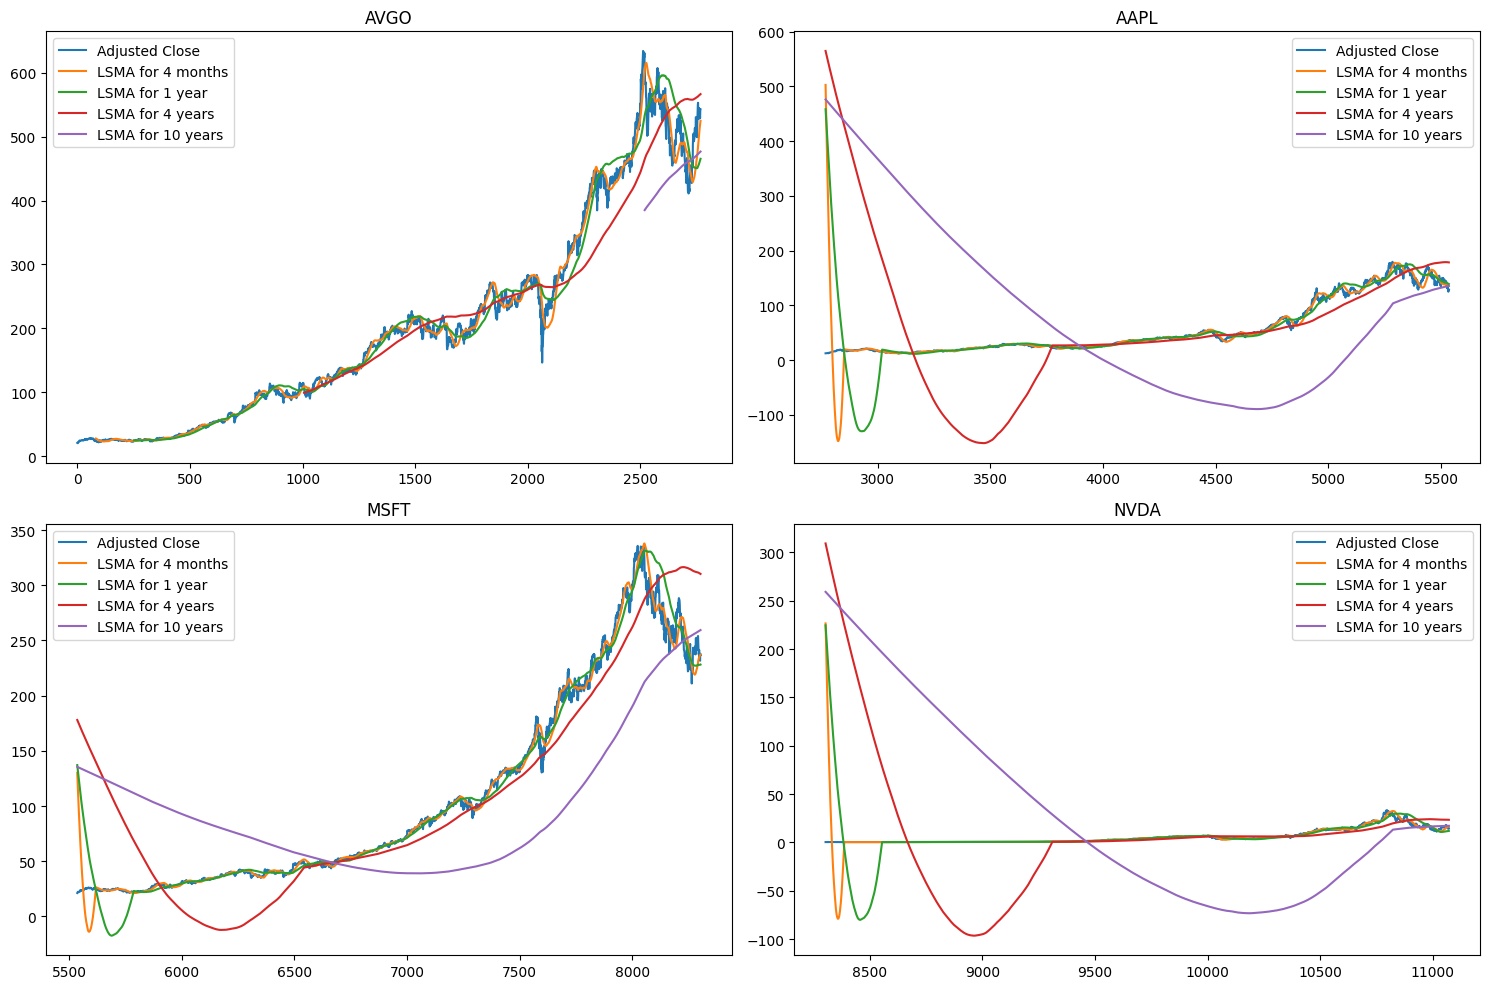

In [12]:
# Define the moving average periods in terms of number of days
ma_periods = [84, 252, 1008, 2520]  # 84 days (approx 4 months), 252 days (1 year), 1008 days (4 years), 2520 days (10 years)

# Calculate LSMA for each moving average period
for ma in ma_periods:
    column_name = f"LSMA for {ma} days"
    new_stock_data[column_name] = np.nan  # Initialize column with NaNs
    for i in range(ma-1, len(new_stock_data)):
        window_data = new_stock_data['Adj Close'].iloc[i-ma+1:i+1]  # Get data within the window
        x = np.arange(1, ma+1)
        slope, intercept = np.polyfit(x, window_data, 1)  # Fit a linear polynomial
        new_stock_data.at[new_stock_data.index[i], column_name] = slope * ma + intercept  # LSMA value for current date
       

# Map original column names to readable labels for legend
legend_mapping = {
    'Adj Close': 'Adjusted Close',
    f'LSMA for 84 days': 'LSMA for 4 months',
    f'LSMA for 252 days': 'LSMA for 1 year',
    f'LSMA for 1008 days': 'LSMA for 4 years',
    f'LSMA for 2520 days': 'LSMA for 10 years'
}

# Plot the data
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Assuming you want to plot the first 4 symbols in new_stock_data
symbols_to_plot = new_stock_data['Symbol'].unique()[:4]

for i, symbol in enumerate(symbols_to_plot, 1):
    if i > 4:  # Stop if there are more than 4 symbols
        break
    data = new_stock_data[new_stock_data['Symbol'] == symbol]
    row = (i - 1) // 2
    col = (i - 1) % 2
    
    # Rename columns for legend
    renamed_columns = [legend_mapping.get(col, col) for col in data.columns]
    data.columns = renamed_columns
    
    data[['Adjusted Close', 'LSMA for 4 months', 'LSMA for 1 year', 'LSMA for 4 years', 'LSMA for 10 years']].plot(ax=axes[row, col])
    axes[row, col].set_title(symbol)
    axes[row, col].legend()

fig.tight_layout()
plt.show()


In [13]:
# Extracting 'Adj Close' column into a new DataFrame
adj_close_data = new_stock_data[['Symbol', 'Date', 'Adj Close']].copy()

# Displaying summary information
print(adj_close_data.info())
print(adj_close_data.describe())

# Set 'Date' as index and 'Symbol' as columns
adj_close_pivot = adj_close_data.pivot(index='Date', columns='Symbol', values='Adj Close')

# Calculate percentage change
tech_rets = adj_close_pivot.pct_change()

# Display the first few rows of the result
print(tech_rets.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27585 entries, 0 to 27584
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Symbol     27585 non-null  object        
 1   Date       27585 non-null  datetime64[ns]
 2   Adj Close  27585 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 646.7+ KB
None
                                Date     Adj Close
count                          27585  27585.000000
mean   2017-07-10 00:04:26.231647488     87.045988
min              2012-01-03 00:00:00      0.260951
25%              2014-10-14 00:00:00     22.028181
50%              2017-07-11 00:00:00     50.017597
75%              2020-04-07 00:00:00    122.375999
max              2022-12-30 00:00:00    634.010742
std                              NaN     96.562099
Symbol          AAPL      AMZN      AVGO      GOOG     GOOGL       LLY  META  \
Date                                    

In [14]:
# Assuming adj_close_data is your DataFrame containing 'Adj Close' prices
adj_close_pct_change = adj_close_data['Adj Close'].pct_change()

# Displaying the first few rows to show the percentage change
print(adj_close_pct_change.head())


0         NaN
1   -0.017271
2    0.001406
3   -0.006317
4    0.067467
Name: Adj Close, dtype: float64


In [15]:
# Create a new DataFrame with only 'Adj Close' column
adj_close_df = new_stock_data.pivot_table(index='Date', columns='Symbol', values='Adj Close')
adj_close_df.head()

Symbol,AAPL,AMZN,AVGO,GOOG,GOOGL,LLY,META,MSFT,NVDA,TSLA
Date,,,,,,,,,,
2012-01-03,12.416984,8.9515,21.014938,16.554291,16.632812,30.881147,NaN,21.200518,0.321947,1.872000
2012-01-04,12.483710,8.8755,20.651979,16.625692,16.704554,30.075882,NaN,21.699434,0.325615,1.847333
2012-01-05,12.622305,8.8805,20.681013,16.395069,16.472836,29.772987,NaN,21.921183,0.337310,1.808000
2012-01-06,12.754258,9.1305,20.550362,16.171415,16.248119,29.462704,NaN,22.261723,0.333412,1.794000
2012-01-09,12.734027,8.9280,21.936831,15.485767,15.559219,29.410990,NaN,21.968700,0.333412,1.816667


 Comparing The Stock Perfomance Risk-Return Tradeoff

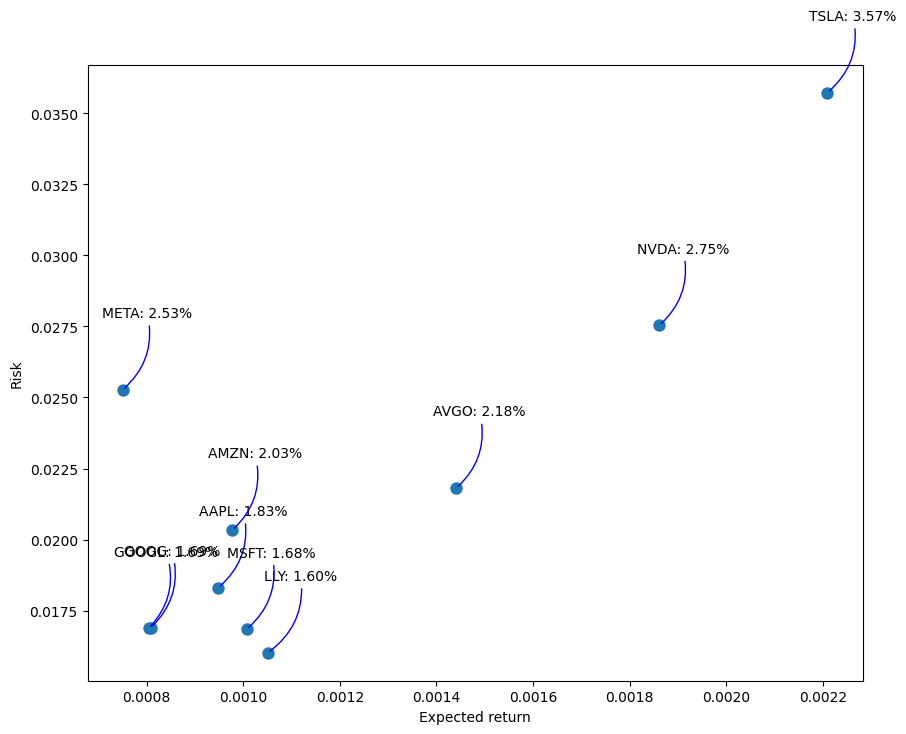

In [16]:
#Initialize anew variable and drop any null value
rets = tech_rets.dropna()
area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, y in zip(rets.columns, rets.std()):
    plt.annotate(f'{label}: {y:.2%}', xy=(rets.mean()[label], y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))


Select Apple("AAPL") to Stock for this Stock Prediction Price 

In [17]:
# Define the ticker symbol
tickerSymbol = 'AAPL'

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
# Use datetime.now() after importing datetime
df = tickerData.history(period='1d', start='2012-1-1', end=datetime.datetime.now())

# Show the data
print(df)


                                 Open        High         Low       Close  \
Date                                                                        
2012-01-03 00:00:00-05:00   12.361728   12.455331   12.349650   12.416984   
2012-01-04 00:00:00-05:00   12.379843   12.521155   12.358103   12.483713   
2012-01-05 00:00:00-05:00   12.529304   12.638005   12.460460   12.622304   
2012-01-06 00:00:00-05:00   12.674847   12.764827   12.658240   12.754259   
2012-01-09 00:00:00-05:00   12.847864   12.915801   12.722555   12.734029   
...                               ...         ...         ...         ...   
2024-07-08 00:00:00-04:00  227.089996  227.850006  223.250000  227.820007   
2024-07-09 00:00:00-04:00  227.929993  229.399994  226.369995  228.679993   
2024-07-10 00:00:00-04:00  229.300003  233.080002  229.250000  232.979996   
2024-07-11 00:00:00-04:00  231.389999  232.389999  225.770004  227.570007   
2024-07-12 00:00:00-04:00  228.919998  232.639999  228.679993  230.539993   

In [18]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2994

Machine Learning using Sklearn

In [19]:
# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .95))

training_data_len


2994

In [20]:
# Function to create X and y datasets
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)


In [21]:
# Create X and y datasets for training
time_step = 60  # Using the last 60 days' prices to predict the next day
X_train, y_train = create_dataset(dataset[:training_data_len], time_step)
X_test, y_test = create_dataset(dataset[training_data_len:], time_step)


In [22]:
#Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Get predictions
predictions = model.predict(X_test)

predictions

array([184.48840427, 181.84227869, 180.56556792, 183.41074915,
       181.73411941, 181.07810633, 180.12182462, 174.71015391,
       170.31484866, 169.11423929, 169.54576329, 169.87595575,
       172.41148189, 173.49858445, 170.80805904, 172.71315471,
       172.07823978, 173.56361593, 174.98688578, 178.2596215 ,
       171.9122004 , 172.55849159, 171.86617343, 170.84233615,
       172.75566617, 171.47239402, 169.30137681, 169.33399488,
       169.18737158, 169.45331911, 169.45564439, 167.99584736,
       170.06953359, 167.74035196, 175.00132176, 175.87670796,
       173.16486263, 169.1591631 , 168.19955097, 167.68024385,
       164.91070554, 165.83747146, 166.68288601, 168.74075807,
       169.89692681, 169.72311698, 173.63688489, 170.62207107,
       169.06040842, 173.06707807, 183.03294915, 181.55366707,
       183.71092437, 181.69397056, 184.75995288, 182.41438938,
       187.03184572, 185.8414871 , 190.60916777, 189.70767298,
       190.48914711, 190.7543873 , 193.2928911 , 191.27

In [23]:
# Create a DataFrame for actual and predicted prices
dates = df.index[training_data_len + time_step:].to_list()  # Dates for X_test
predicted_df = pd.DataFrame({'Date': dates, 'Actual Price': y_test, 'Predicted Price': predictions})


In [24]:
# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 3.2394742227087363


In [25]:
predicted_df.head()

,Date,Actual Price,Predicted Price
0,2024-02-23 00:00:00-05:00,182.272781,184.488404
1,2024-02-26 00:00:00-05:00,180.914627,181.842279
2,2024-02-27 00:00:00-05:00,182.382629,180.565568
3,2024-02-28 00:00:00-05:00,181.174255,183.410749
4,2024-02-29 00:00:00-05:00,180.505173,181.734119


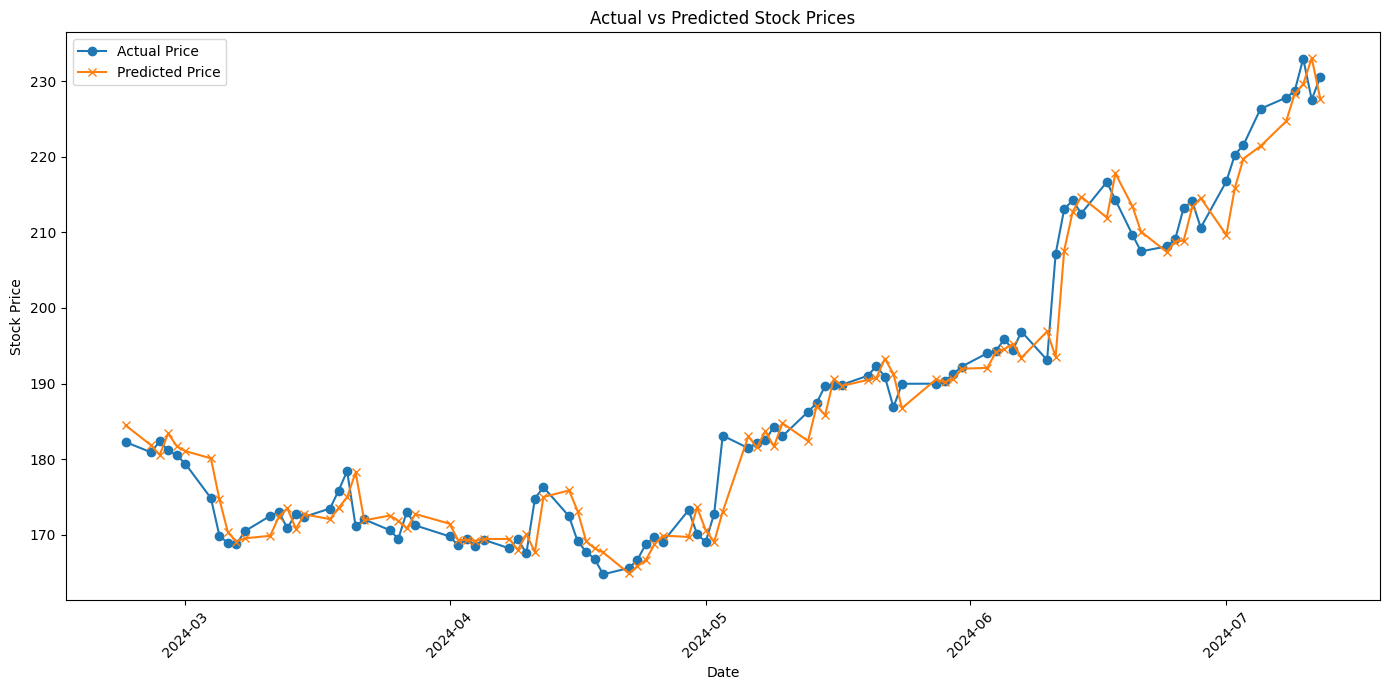

In [26]:
# Plotting actual vs predicted
plt.figure(figsize=(14, 7))
plt.plot(dates, y_test, label='Actual Price', marker='o')
plt.plot(dates, predictions, label='Predicted Price', marker='x')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

In [27]:
# Display the table
predicted_df.head()

,Date,Actual Price,Predicted Price
0,2024-02-23 00:00:00-05:00,182.272781,184.488404
1,2024-02-26 00:00:00-05:00,180.914627,181.842279
2,2024-02-27 00:00:00-05:00,182.382629,180.565568
3,2024-02-28 00:00:00-05:00,181.174255,183.410749
4,2024-02-29 00:00:00-05:00,180.505173,181.734119



Forecasted Prices:
          Date  Forecasted Price
0   2024-07-15        230.721614
1   2024-07-16        230.766976
2   2024-07-17        230.561667
3   2024-07-18        229.666926
4   2024-07-19        229.099463
5   2024-07-22        230.034903
6   2024-07-23        231.238789
7   2024-07-24        230.581089
8   2024-07-25        229.968412
9   2024-07-26        229.810716
10  2024-07-29        230.348932
11  2024-07-30        229.262794
12  2024-07-31        229.641767
13  2024-08-01        229.791161
14  2024-08-02        230.140576
15  2024-08-05        230.332279
16  2024-08-06        230.281064
17  2024-08-07        229.748569
18  2024-08-08        228.826291
19  2024-08-09        227.065913
20  2024-08-12        227.664475
21  2024-08-13        227.541780
22  2024-08-14        226.850767
23  2024-08-15        227.092551
24  2024-08-16        228.081539
25  2024-08-19        228.049129
26  2024-08-20        228.559125
27  2024-08-21        228.040629
28  2024-08-22        2

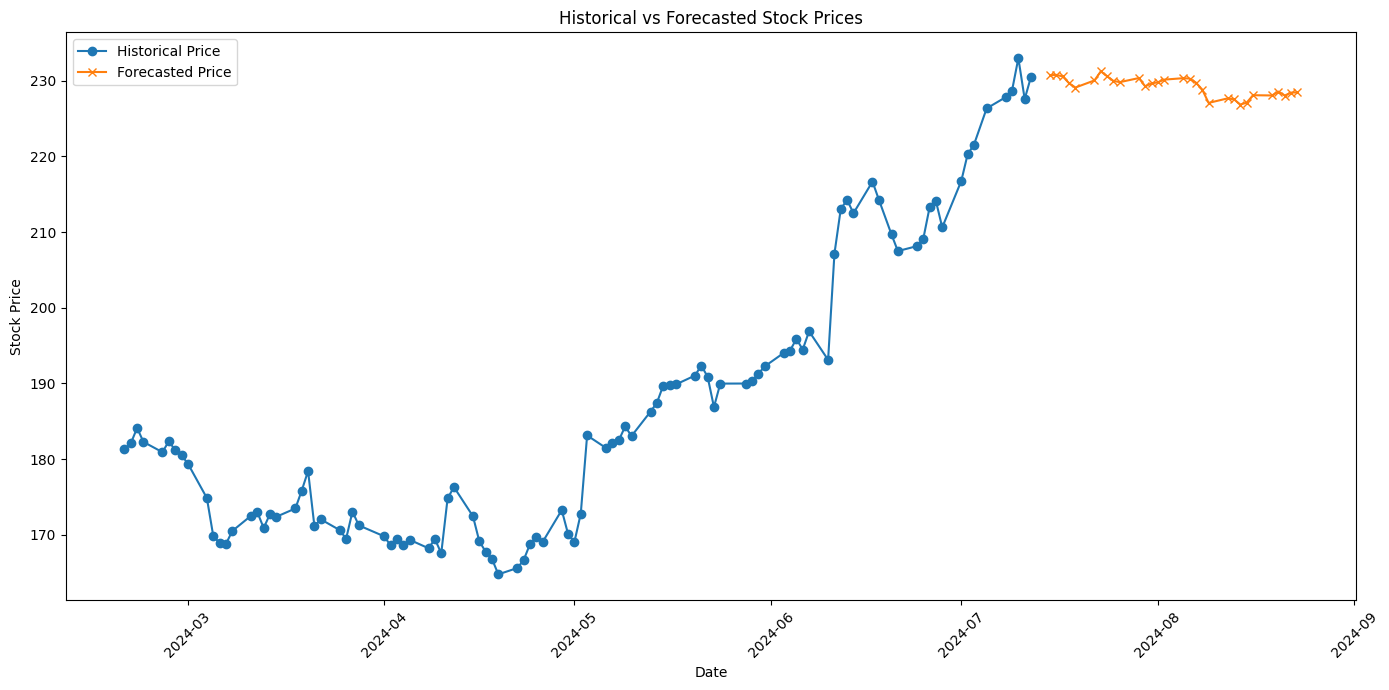

In [28]:

# Forecasting future prices
forecast_days = 30  # Number of days to forecast
last_days = dataset[-time_step:]  # Last time_step days from the dataset

forecast_dates = pd.date_range(start=df.index[-1] + datetime.timedelta(days=1), periods=forecast_days, freq='B')
forecast_dates_str = forecast_dates.strftime('%Y-%m-%d').tolist()

X_forecast = []
for i in range(forecast_days):
    X_forecast.append(last_days[-time_step:, 0])
    next_day_price = model.predict([last_days[-time_step:, 0]])[0]
    last_days = np.append(last_days, next_day_price).reshape(-1, 1)[1:]

forecasted_prices = model.predict(X_forecast)

# Create DataFrame for forecasted prices
forecasted_df = pd.DataFrame({'Date': forecast_dates_str, 'Forecasted Price': forecasted_prices})

# Plotting actual vs forecasted prices
plt.figure(figsize=(14, 7))
plt.plot(df.index[-100:], dataset[-100:], label='Historical Price', marker='o')
plt.plot(forecast_dates, forecasted_prices, label='Forecasted Price', marker='x')
plt.title('Historical vs Forecasted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Display forecasted prices DataFrame
print("\nForecasted Prices:")
print(forecasted_df)

plt.show()


In [29]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')


Root Mean Squared Error (RMSE): 3.2394742227087363


In [30]:
mae = np.mean(np.abs(predictions - y_test))
print(f'Mean Absolute Error (MAE): {mae}')


Mean Absolute Error (MAE): 2.4116896781941417


In [31]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv = np.sqrt(-scores.mean())
print(f'Cross-Validated RMSE: {rmse_cv}')


Cross-Validated RMSE: 1.6237881768012095


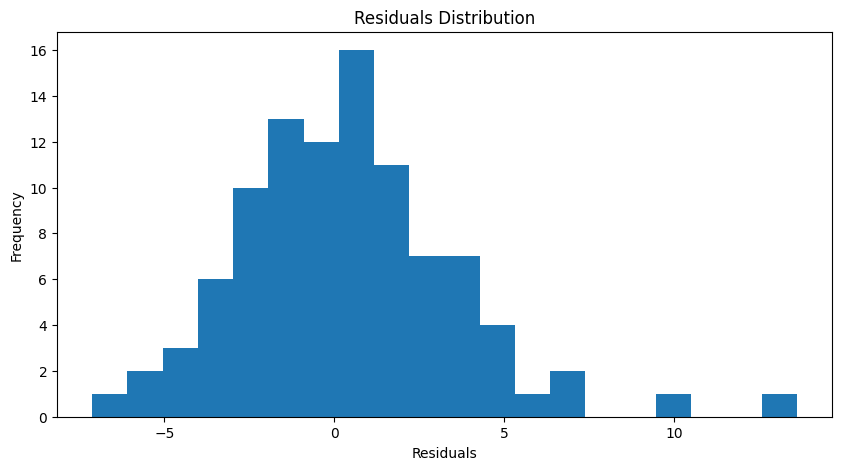

In [32]:
residuals = y_test - predictions
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=20)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
